# PROJECT 2: DIABETES ANALYSIS

# Import Libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Load data

In [2]:
df = pd.read_csv('diabetes data.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Cleaning

In [62]:
# check for missing values

missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Check for duplicates

df.duplicated().sum()

0

In [9]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Analysis

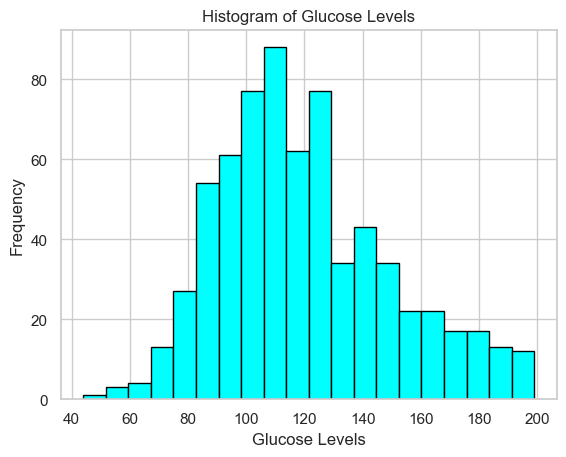

In [76]:

# Create a histogram for Glucose
plt.hist(df['Glucose'], bins=20, color='aqua', edgecolor='black')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels')

#show
plt.show()

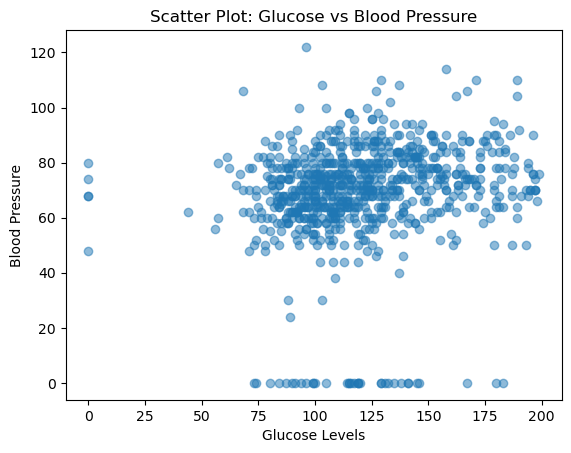

In [11]:
# Create a scatter plot for 'Glucose' vs 'BloodPressure'
plt.scatter(df['Glucose'], df['BloodPressure'], alpha=0.5)
plt.xlabel('Glucose Levels')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot: Glucose vs Blood Pressure')

# Show the scatter plot
plt.show()



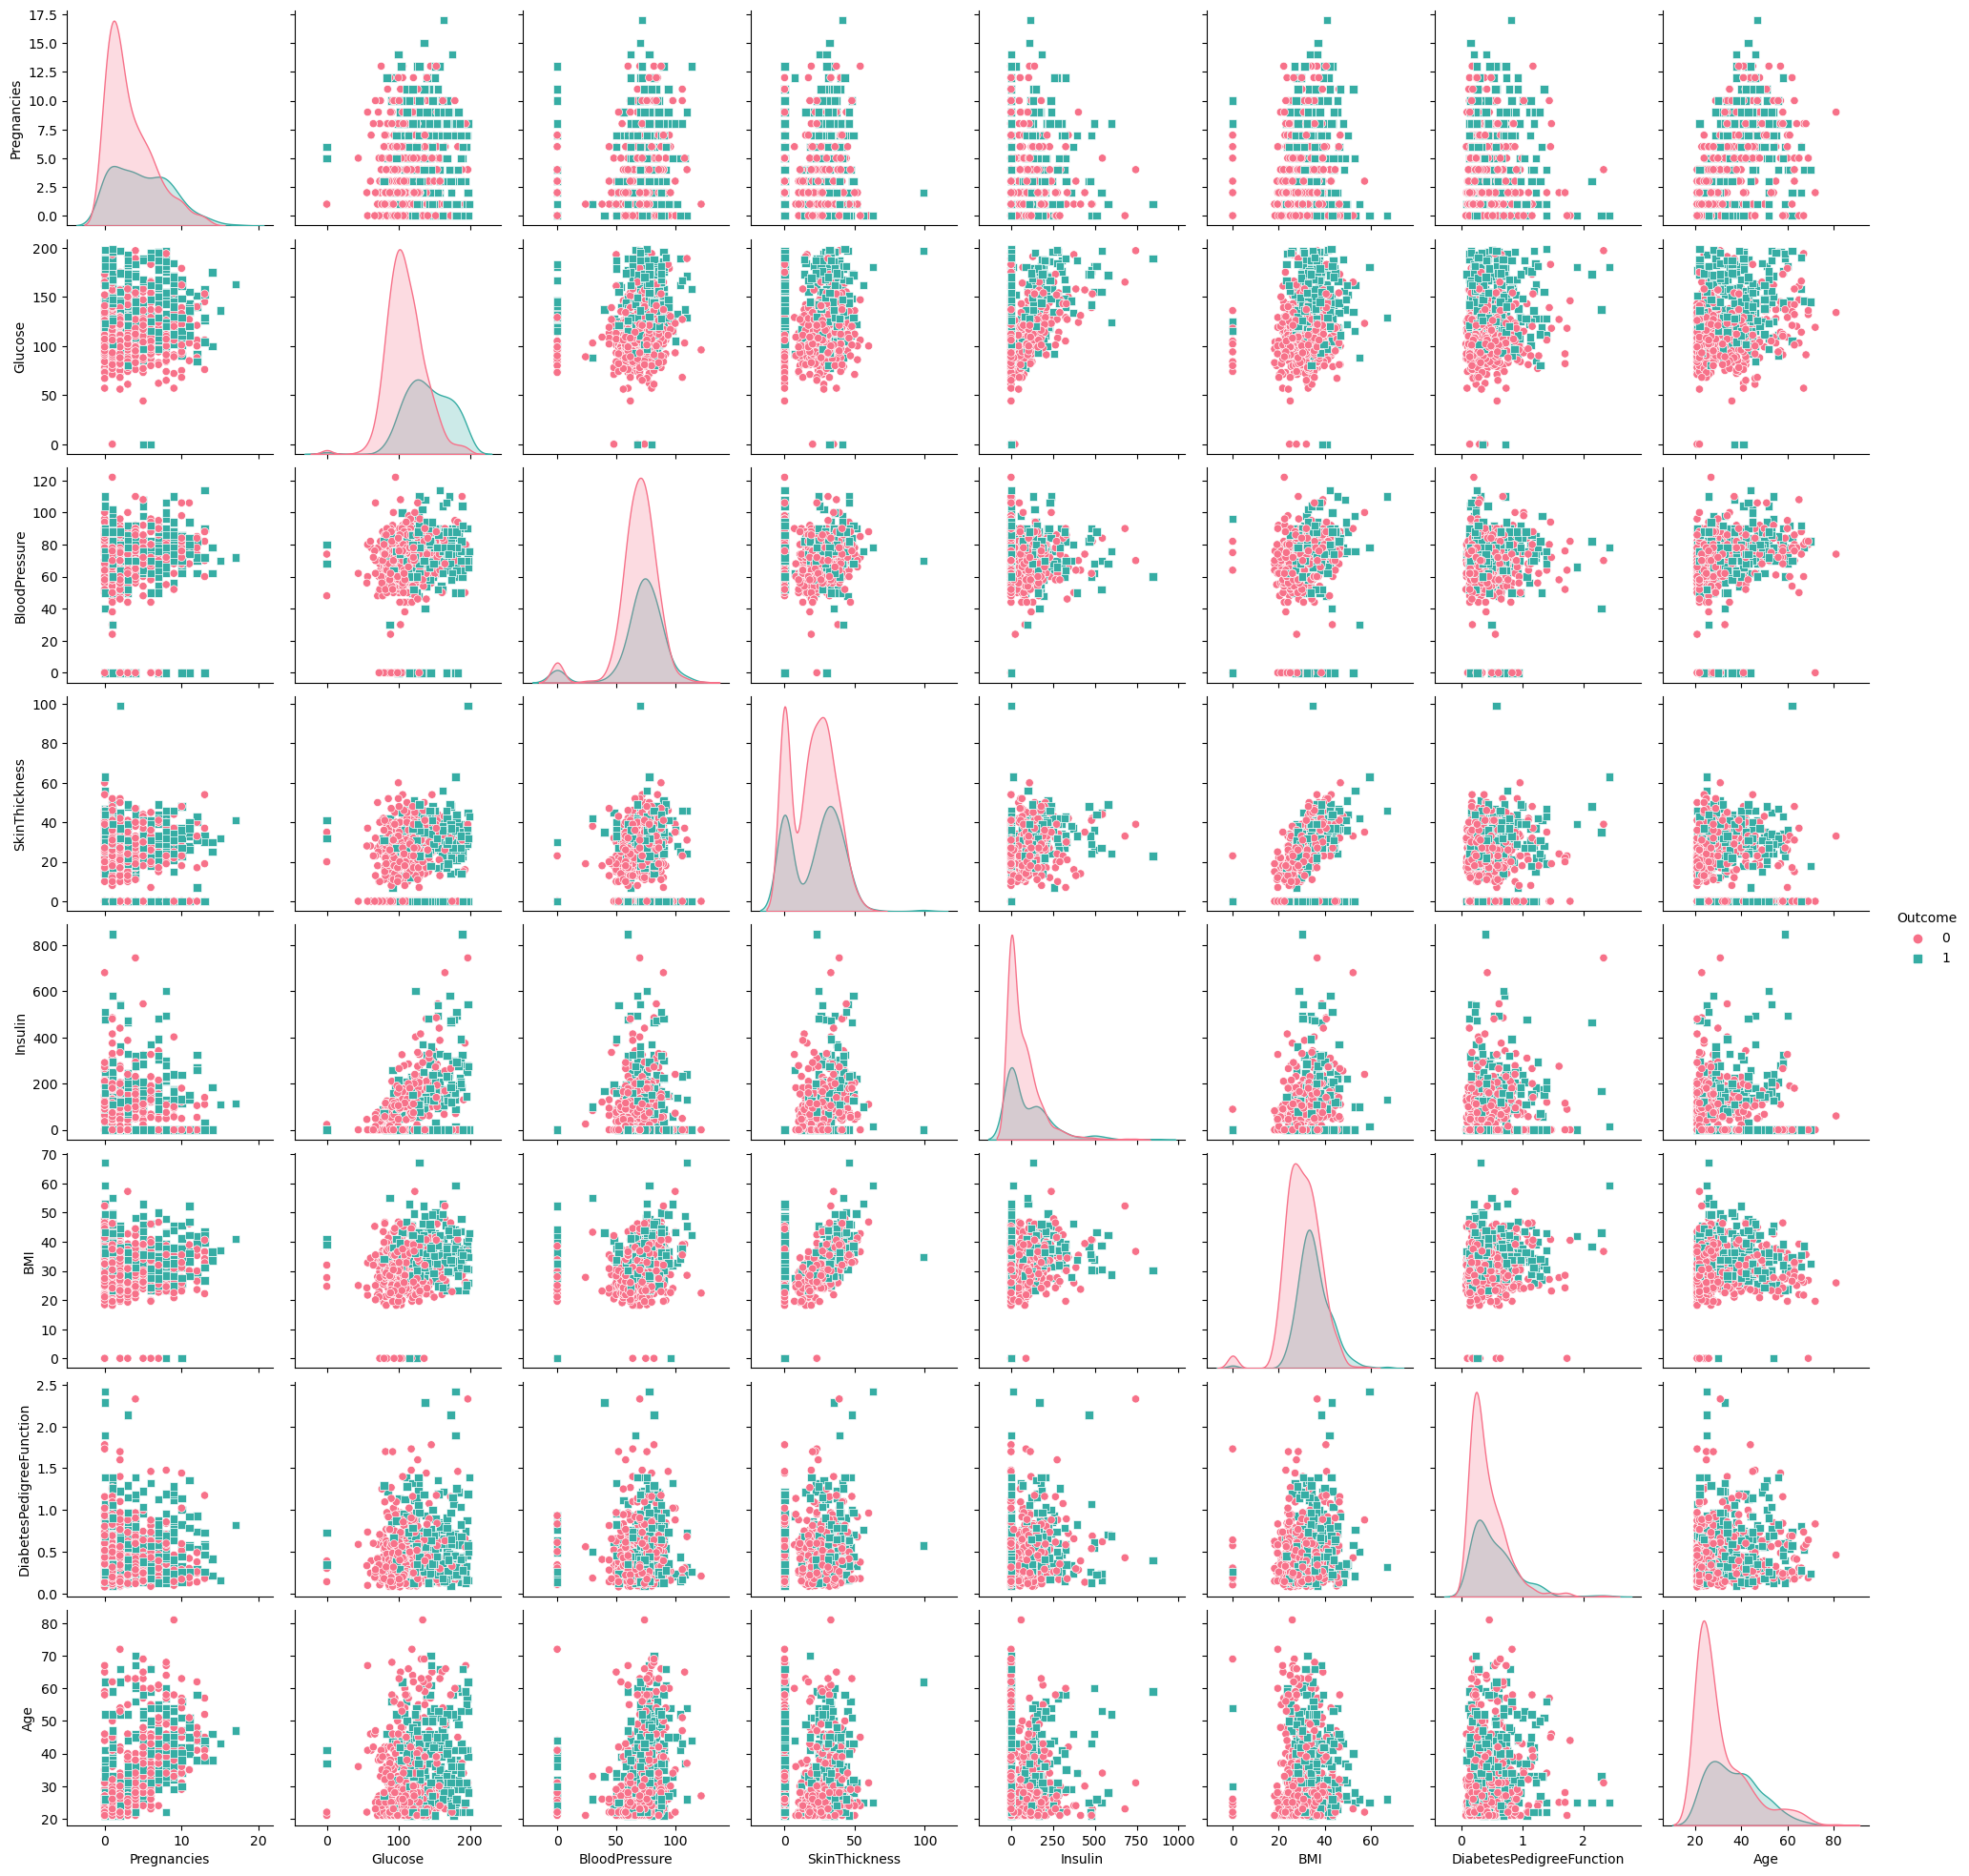

In [16]:
sns.pairplot(df, hue='Outcome', palette='husl', markers=["o", "s"])
plt.show()

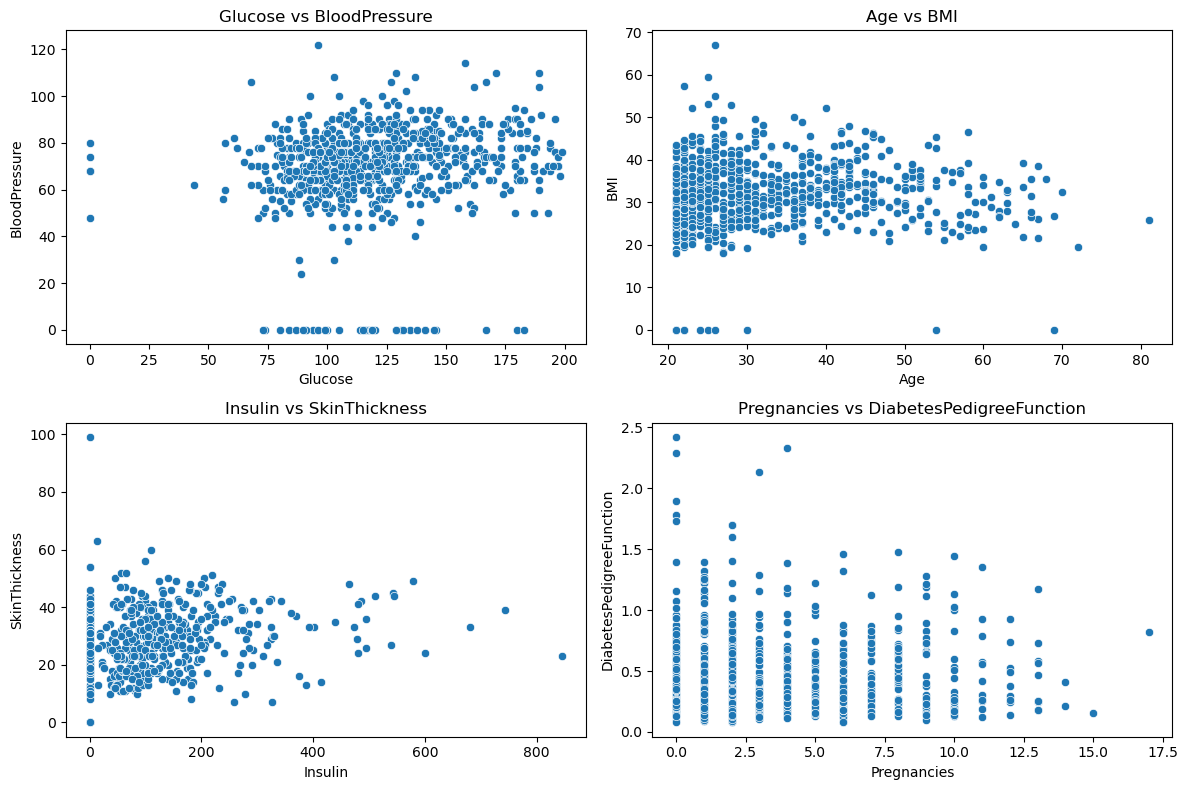

In [17]:
# Create a pair plot with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

# Plot the first subplot (top-left)
sns.scatterplot(x='Glucose', y='BloodPressure', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Glucose vs BloodPressure')

# Plot the second subplot (top-right)
sns.scatterplot(x='Age', y='BMI', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs BMI')

# Plot the third subplot (bottom-left)
sns.scatterplot(x='Insulin', y='SkinThickness', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Insulin vs SkinThickness')

# Plot the fourth subplot (bottom-right)
sns.scatterplot(x='Pregnancies', y='DiabetesPedigreeFunction', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Pregnancies vs DiabetesPedigreeFunction')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

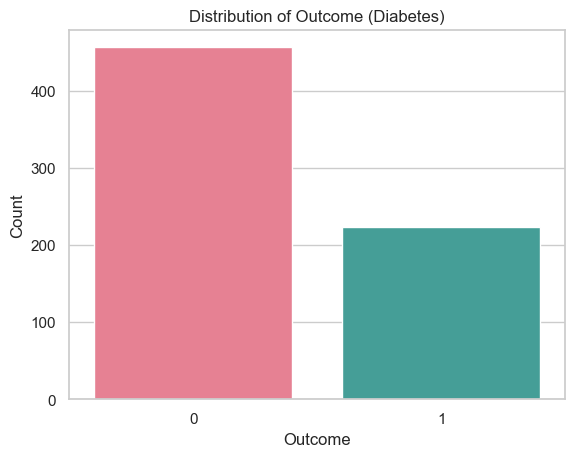

In [77]:
# Create a bar plot for 'Outcome'
sns.countplot(x='Outcome', data=df, palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes)')

#Show the bar plot
plt.show()

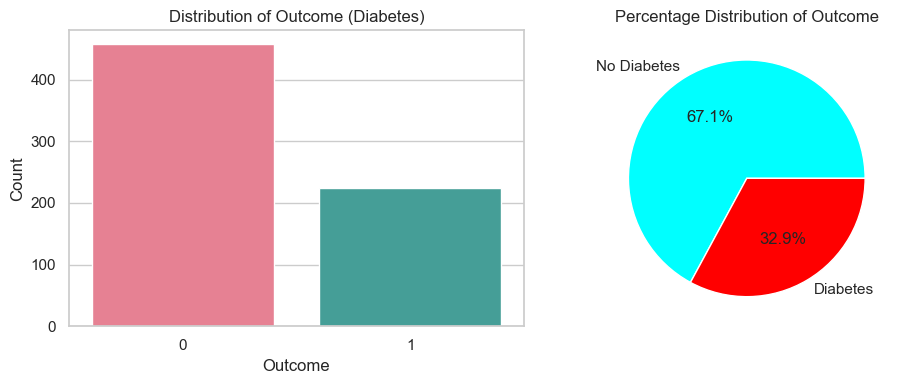

In [78]:
# Calculate the count of each class
class_counts = df['Outcome'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(df) * 100

# Create a countplot of the 'Outcome' variable
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes)')

# Create a pie chart to show the percentage distribution
plt.subplot(1, 2, 2)
plt.pie(class_percentages, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['aqua', 'red'])
plt.title('Percentage Distribution of Outcome')

plt.tight_layout()
plt.show()




In [72]:
# Create a grouped bar plot
fig = px.histogram(df, x='Pregnancies', color='Outcome', 
                   title='Grouped Bar Plot of Outcome by Unique Pregnancy Numbers',
                   labels={'Pregnancies': 'Pregnancies', 'count': 'Count'},
                   barmode='group')

# Show the plot
fig.show()

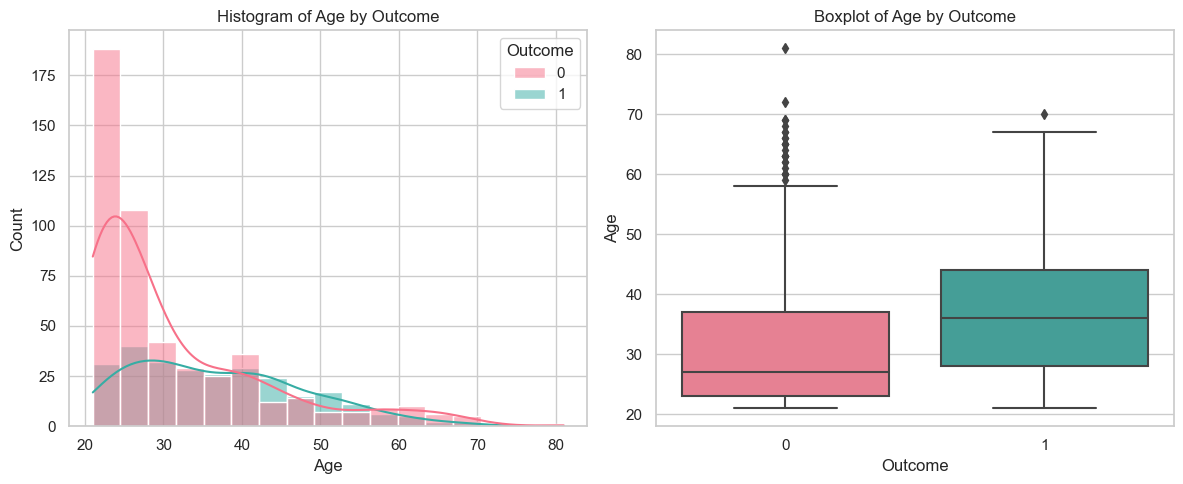

In [37]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'Age' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, palette='husl')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Outcome')

# Create a boxplot of 'Age' based on 'Outcome'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Age', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Boxplot of Age by Outcome')

plt.tight_layout()
plt.show()

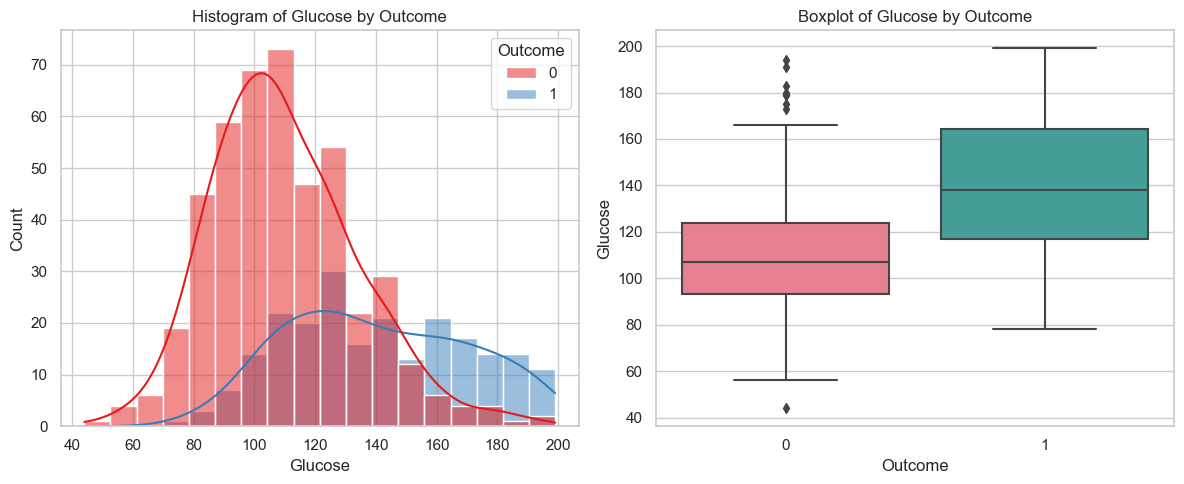

In [74]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'Glucose' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, palette='Set1')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Histogram of Glucose by Outcome')

# Create a boxplot of 'Outcome' vs. 'Glucose'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Boxplot of Glucose by Outcome')

plt.tight_layout()
plt.show()


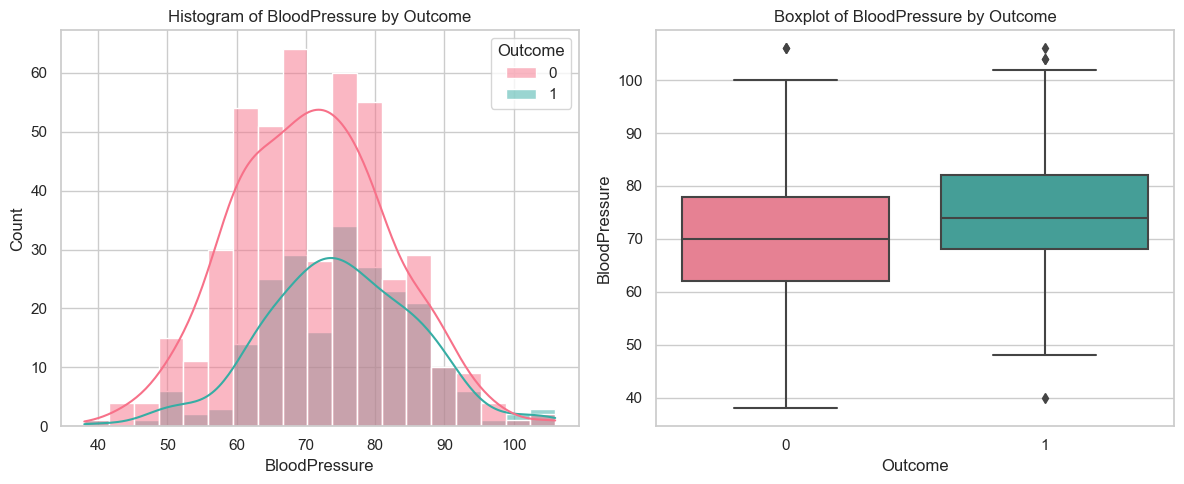

In [73]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'BloodPressure' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True, palette='husl')
plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.title('Histogram of BloodPressure by Outcome')

# Create a boxplot of 'Outcome' vs. 'BloodPressure'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.title('Boxplot of BloodPressure by Outcome')

plt.tight_layout()
plt.show()

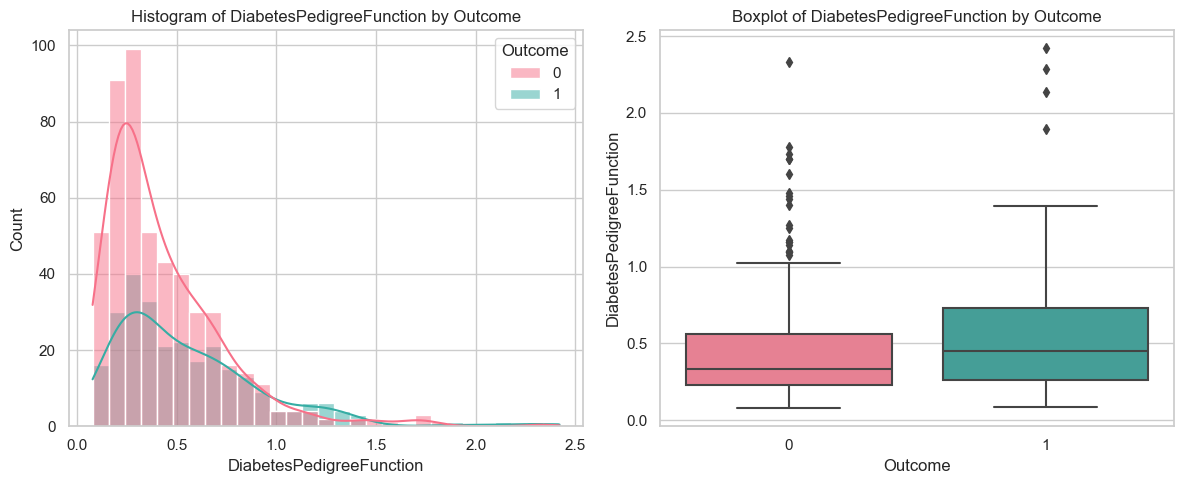

In [40]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'DiabetesPedigreeFunction' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, palette='husl')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.title('Histogram of DiabetesPedigreeFunction by Outcome')

# Create a boxplot of 'Outcome' vs. 'DiabetesPedigreeFunction'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('Boxplot of DiabetesPedigreeFunction by Outcome')

plt.tight_layout()
plt.show()

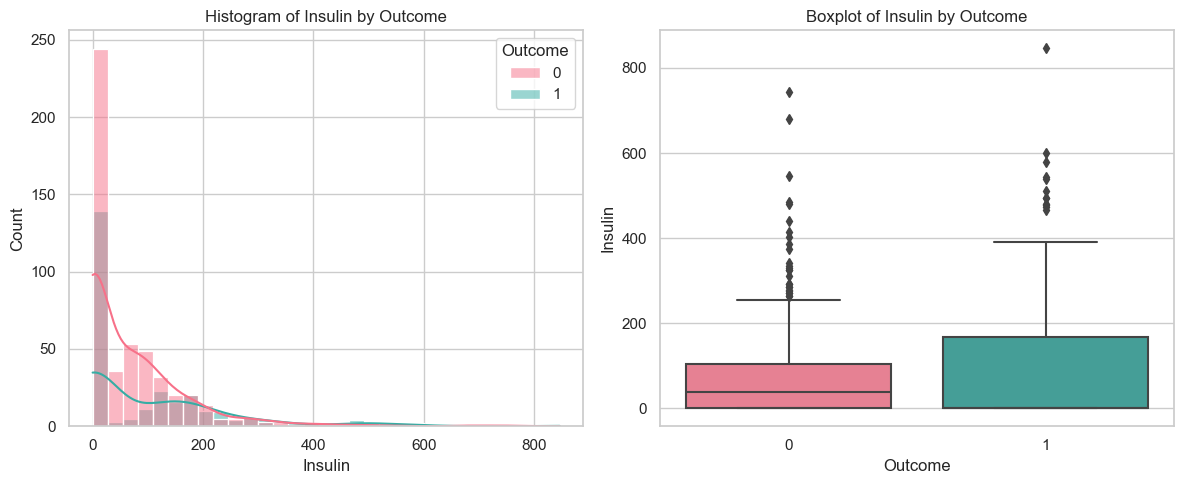

In [41]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'Insulin' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True, palette='husl')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.title('Histogram of Insulin by Outcome')

# Create a boxplot of 'Outcome' vs. 'Insulin'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Insulin', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.title('Boxplot of Insulin by Outcome')

plt.tight_layout()
plt.show()



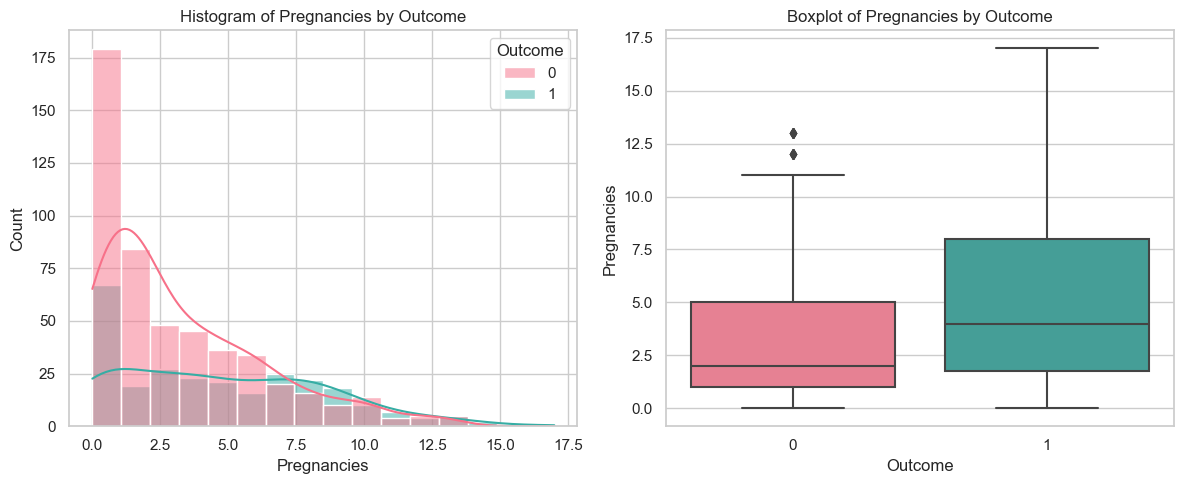

In [42]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram (histplot) of 'Pregnancies' based on 'Outcome'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, palette='husl')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Histogram of Pregnancies by Outcome')

# Create a boxplot of 'Outcome' vs. 'Pregnancies'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Pregnancies', palette='husl')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.title('Boxplot of Pregnancies by Outcome')

plt.tight_layout()
plt.show()

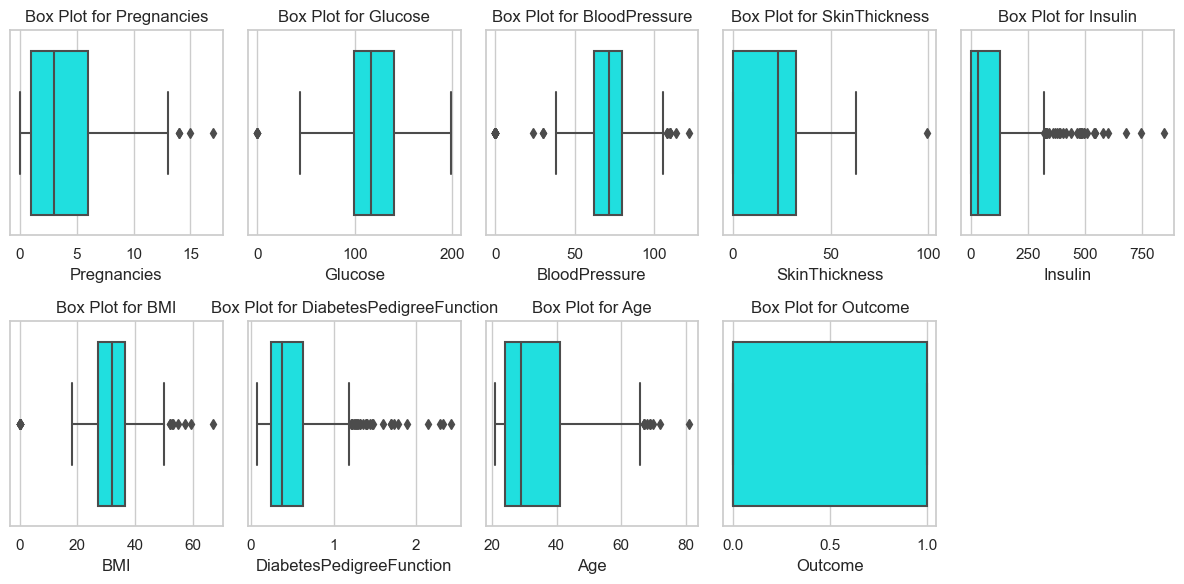

In [43]:
# Create a box plot for each column to visualize outliers
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid") 

# Loop through each numeric column and create a box plot
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.subplot(2, 5, df.columns.get_loc(column) + 1)  # 2 rows, 5 columns of subplots
        sns.boxplot(x=df[column], color='aqua')
        plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [54]:
# Calculate the IQR
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Glucose' column
df = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]

In [56]:
# Calculate the IQR
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Glucose' column
df = df[(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)]

In [57]:
# Calculate the IQR
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Glucose' column
df = df[(df['SkinThickness'] >= lower_bound) & (df['SkinThickness'] <= upper_bound)]

In [58]:
# Calculate the IQR
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Glucose' column
df = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

In [59]:
# Calculate the IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Glucose' column
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

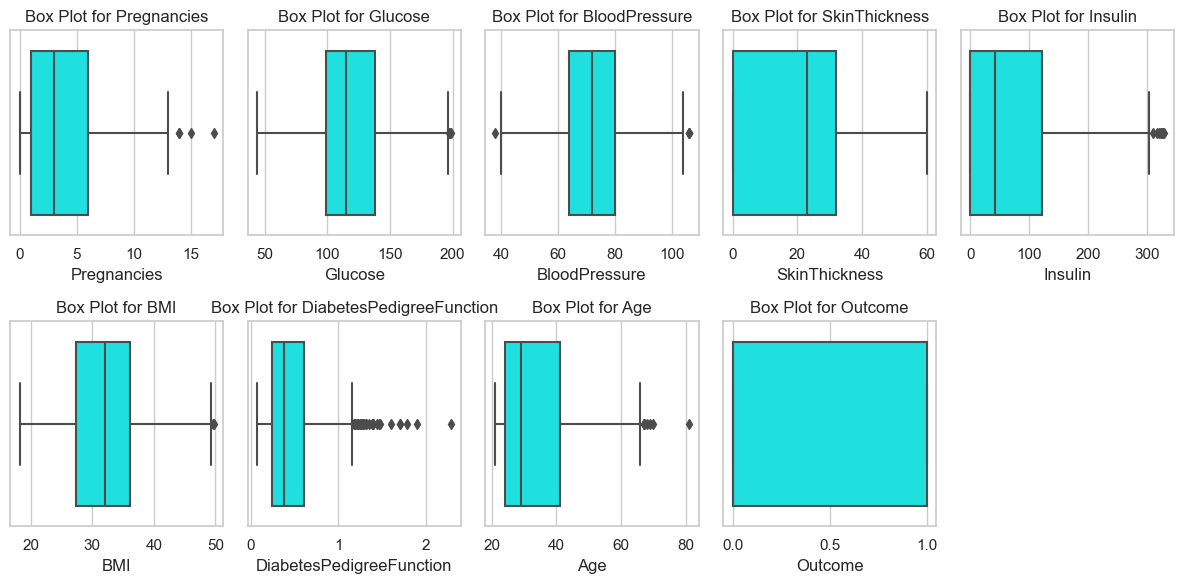

In [60]:
# Create a box plot for each column after outlier treatment
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid") 

# Loop through each numeric column and create a box plot
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']: 
        plt.subplot(2, 5, df.columns.get_loc(column) + 1)  
        sns.boxplot(x=df[column], color='aqua')
        plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [63]:
# calculate the correlation matrix
corr = df.corr()

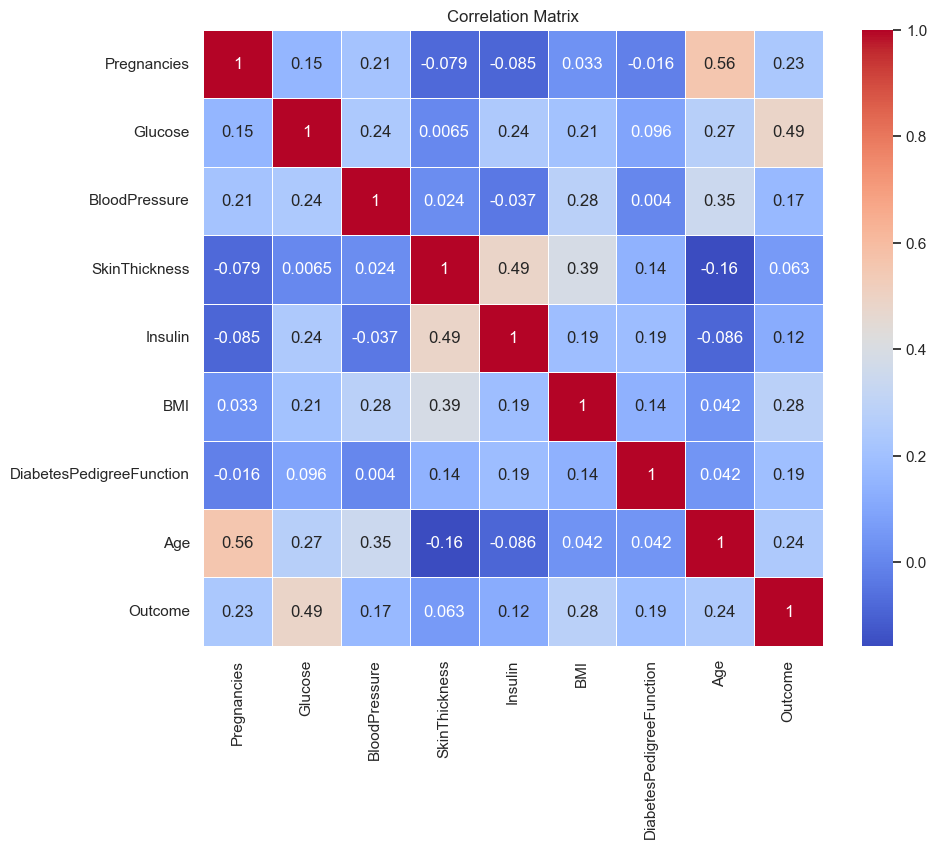

In [64]:
# plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

#show the correlation matrix
plt.show()

# Insights
* The total number of patients is 768
* The total number of patients with diabetes is 268
* Based on the analysis, the total number of people with diabetes is 500 while 268 are non-diabetic
* Increase glucose levels, blood pressure, BMI and skin thickness correlates with the risk of getting diabetes
* Number of pregnanncy reduces the risk of diabetes